# Task 1

In [6]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print("X_train.shape= ", X_train.shape)
print("y_train.shape= ", y_train.shape)
print("X_test.shape= ", X_test.shape)
print("y_test.shape= ", y_test.shape)

X_train.shape=  (112, 4)
y_train.shape=  (112,)
X_test.shape=  (38, 4)
y_test.shape=  (38,)


In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

knn = KNeighborsClassifier(n_neighbors = 24)

def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = normalize(X_train, X_test)

knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8933333333333333

In [127]:
from sklearn.metrics import accuracy_score

k_best = None
score_best = 0

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    
    if score > score_best:
        score_best = score
        k_best = k

print(f'Найкраще k = {k_best}, точність = {score_best:.2f}')

Найкраще k = 36, точність = 0.92


# Task 2

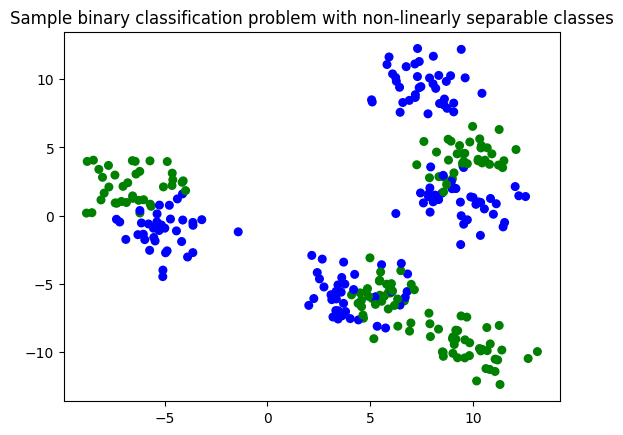

In [33]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=30, cmap=cmap_bold)

In [98]:
X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_D2, y_D2, random_state = 2021)

print ('X_train.shape= ',X_train_D2.shape)
print ('y_train.shape= ',y_train_D2.shape)
X_train_D2[:5]

X_train.shape=  (225, 2)
y_train.shape=  (225,)


array([[  9.82952476, -10.26599979],
       [  9.54660718,   3.5317529 ],
       [  6.45518346,   7.58214601],
       [  3.62671973,  -7.34491777],
       [  6.05699006,  -5.58984624]])

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

n_neighbors = 3

scaler= StandardScaler()
X_train_scaled_D2 = scaler.fit_transform(X_train)
X_test_scaled_D2 = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train_scaled_D2, y_train_D2)
knn_reg.score(X_test_scaled_D2, y_test_D2)

0.7447768281101614

In [132]:
k_best_reg = None
score_best_reg = 0

for k_D2 in range(1, 20):
    knn_reg = KNeighborsClassifier(n_neighbors = k_D2)
    knn_reg.fit(X_train_scaled_D2, y_train_D2)
    y_pred_D2 = knn_reg.predict(X_test_scaled_D2)
    score_D2 = accuracy_score(y_test_D2, y_pred_D2)
    
    if score_D2 > score_best_reg:
        score_best_reg = score_D2
        k_best_reg = k_D2

print(f'Найкраще k = {k_best_reg}, точність = {score_best_reg:.2f}')

Найкраще k = 3, точність = 0.91


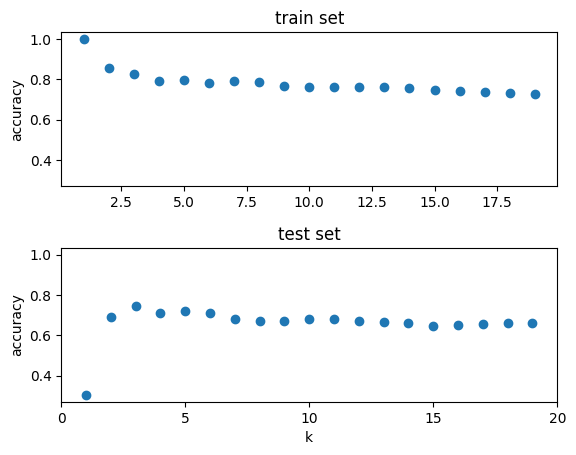

In [ ]:
fig, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1, sharey=True)
k_range = range(1,20)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train_D2, y_train_D2)
    scores_train.append(knn.score(X_train_D2, y_train_D2))
    scores_test.append(knn.score(X_test_D2, y_test_D2))


plt.sca(ax1)
plt.ylabel('accuracy')

ax1.scatter(k_range, scores_train)


plt.sca(ax2)
plt.xlabel('k')

plt.ylabel('accuracy')
ax2.scatter(k_range, scores_test)
plt.xticks([0,5,10,15,20]);
fig.subplots_adjust(hspace=.4) # set the vertical space 
ax1.set_title('train set');
ax2.set_title('test set');